# Acorn counting experiment

This notebook contains the preliminary analysis of my acorn count observational experiment, carried out on Noth-West Poland.

Species analysed: 
- Common European Pedunculate Oak (_Quercus petraea_)
- Alien invasive Red Oak (_Quercus rubra_)

The used programming language is R

In [2]:
getwd()

[1] "C:/Users/sarah/Documents/Projects/acorn_observational_experiment"

In [7]:
# Importing standard packages
library(dplyr)
library(ggplot2)
library(plotly)

# Read data

In [9]:
#Read csv
seedrain_dataset <- read.csv("Acorn counting_master_new.csv", header = T, sep=";", dec=".")

#Specify feature data type
seedrain_dataset$year = as.factor(seedrain_dataset$year)
seedrain_dataset$month = as.factor(seedrain_dataset$month)
seedrain_dataset$plot = as.factor(seedrain_dataset$plot)
seedrain_dataset$tree = as.factor(seedrain_dataset$tree)
seedrain_dataset$species = as.factor(seedrain_dataset$species)
seedrain_dataset$area_traps_m2 = as.numeric(seedrain_dataset$area_traps_m2)
seedrain_dataset$acorns = as.numeric(seedrain_dataset$acorns)
seedrain_dataset$aborted_tot = as.numeric(seedrain_dataset$aborted_tot)
summary(seedrain_dataset)

Warning message in eval(expr, envir, enclos):
"NA introdotti per coercizione"


     number        year        date                month              plot   
 Min.   : 1.00   2021:37   Length:74          November:37   elle        : 8  
 1st Qu.:19.25   NA's:37   Class :character   October :37   far_far_away: 8  
 Median :37.50             Mode  :character                 ro_plot     :34  
 Mean   :37.50                                              wild        : 8  
 3rd Qu.:55.75                                              wild_far    : 8  
 Max.   :74.00                                              wild_middle : 8  
                                                                             
      tree    species area_traps_m2     acorns       aborted_small  
 1      : 2   RO:34   Min.   : NA   Min.   : 0.000   Min.   : 0.00  
 2      : 2   SO:40   1st Qu.: NA   1st Qu.: 0.000   1st Qu.: 0.00  
 3      : 2           Median : NA   Median : 0.000   Median : 0.00  
 4      : 2           Mean   :NaN   Mean   : 1.838   Mean   : 1.73  
 5      : 2           3rd Qu.: 

## Create datasets for analysis

In [12]:
# dataset with acorns stats
acorns_stats <- seedrain_dataset %>%
  group_by(species, month) %>% 
  filter(!is.na(species)) %>%
  summarize(mean_acorns = mean(acorns, na.rm=TRUE), 
            sd_acorns = sd(acorns, na.rm=TRUE),
            n_acorns = n(),
            SE_acorns = sd_acorns/sqrt(n()))
View(acorns_stats)

`summarise()` has grouped output by 'species'. You can override using the `.groups` argument.


species,month,mean_acorns,sd_acorns,n_acorns,SE_acorns
<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>
RO,November,1.294118,2.4689245,17,0.59880215
RO,October,6.235294,9.3776957,17,2.27442529
SO,November,0.100000,0.3077935,20,0.06882472
SO,October,0.300000,0.8013147,20,0.17917942


In [14]:
# dataset with ABORTED acorns stats
ab_acorns_stats <- seedrain_dataset %>%
  group_by(species, month) %>% 
  filter(!is.na(species)) %>%
  summarize(mean_abacorns = mean(aborted_tot, na.rm=TRUE), 
            sd_abacorns = sd(aborted_tot, na.rm=TRUE),
            n_abacorns = n(),
            SE_abacorns = sd_abacorns/sqrt(n()))
View(ab_acorns_stats)

`summarise()` has grouped output by 'species'. You can override using the `.groups` argument.


species,month,mean_abacorns,sd_abacorns,n_abacorns,SE_abacorns
<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>
RO,November,0.2941176,0.4696682,17,0.1139113
RO,October,0.4117647,0.7122871,17,0.1727550
SO,November,0.5500000,1.1459310,20,0.2562380
SO,October,10.3000000,7.8880322,20,1.7638176


# Exploratory Data Analysis - EDA

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 50 rows containing non-finite values (stat_density)."


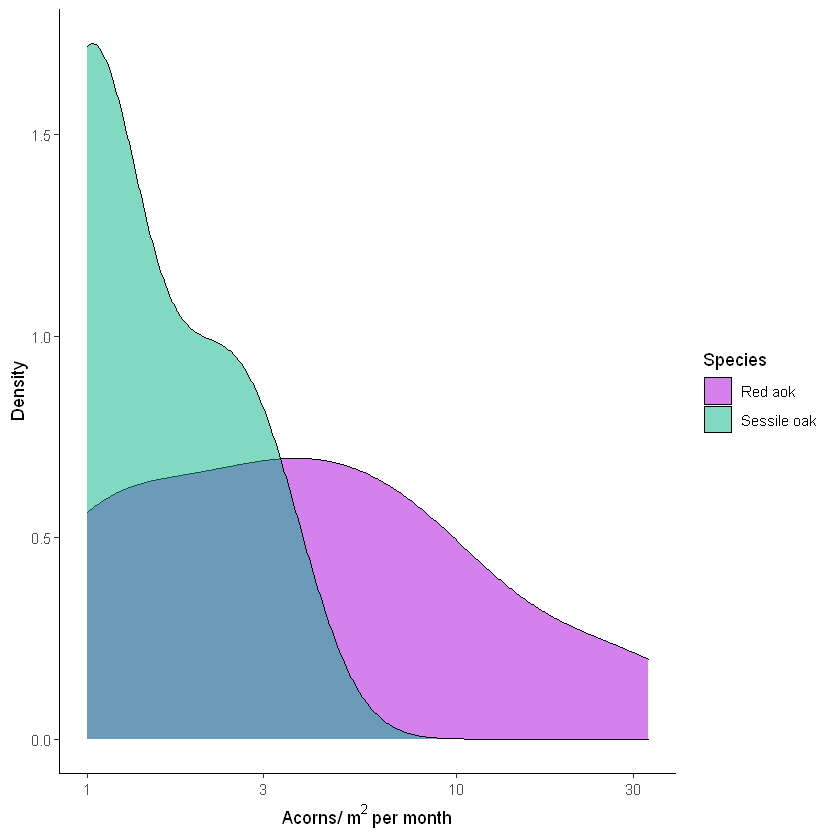

In [17]:
# density chart acorn distribution among species
acornDC <- ggplot (subset(seedrain_dataset, !is.na(acorns), !is.na(species)), 
                             aes(acorns, fill = species)) +
  geom_density(alpha = 0.5, size=.5) +
  labs(x=expression(paste("Acorns/ ", "m"^"2 ", "per month")), 
       y="Density", fill="Species") + 
  scale_x_log10() +
  #facet_grid(~factor(month, level = c("October", "November"))) +
  scale_fill_manual(values = c('#A901DB','#04B486'),
                    labels = c("Red aok", "Sessile oak")) +
  theme_classic()

acornDC

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 41 rows containing non-finite values (stat_density)."


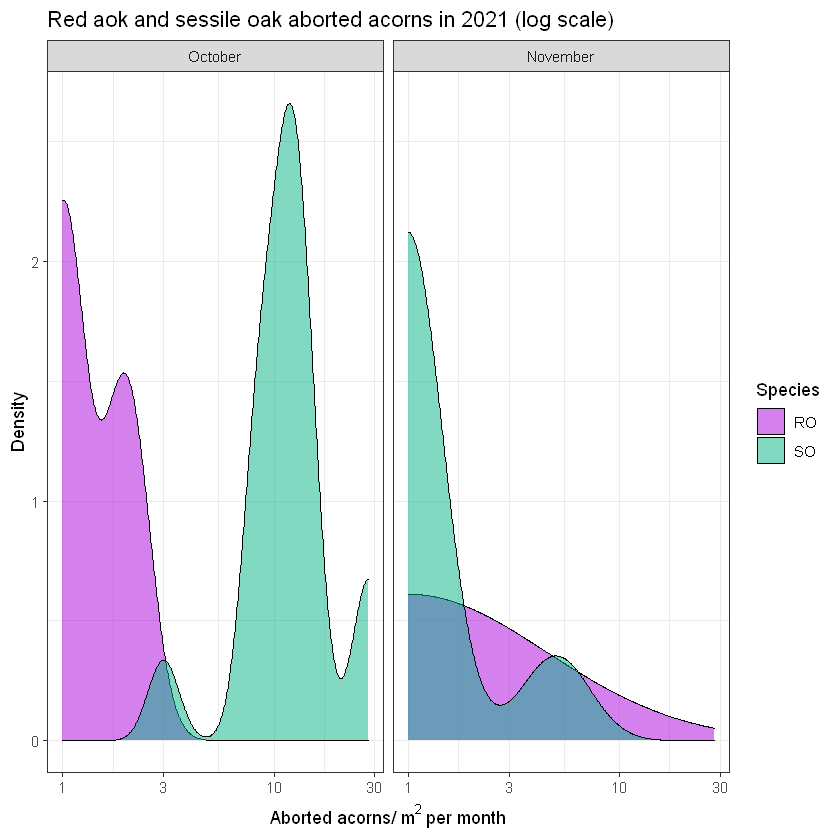

In [19]:
# density chart ABORTED acorn distribution among species
acornDC <- ggplot (subset(seedrain_dataset, !is.na(acorns), !is.na(species)), 
                   aes(x=aborted_tot, fill = species)) +
  geom_density(alpha = 0.5, size=.5) +
  labs(x=expression(paste("Aborted acorns/ ", "m"^"2 ", "per month")), 
       y="Density", fill="Species") + 
  scale_x_log10() +
  facet_grid(~factor(month, level = c("October", "November"))) +
  ggtitle("Red aok and sessile oak aborted acorns in 2021 (log scale)") +
  scale_fill_manual(values = c('#A901DB','#04B486')) +
  theme_bw()
acornDC

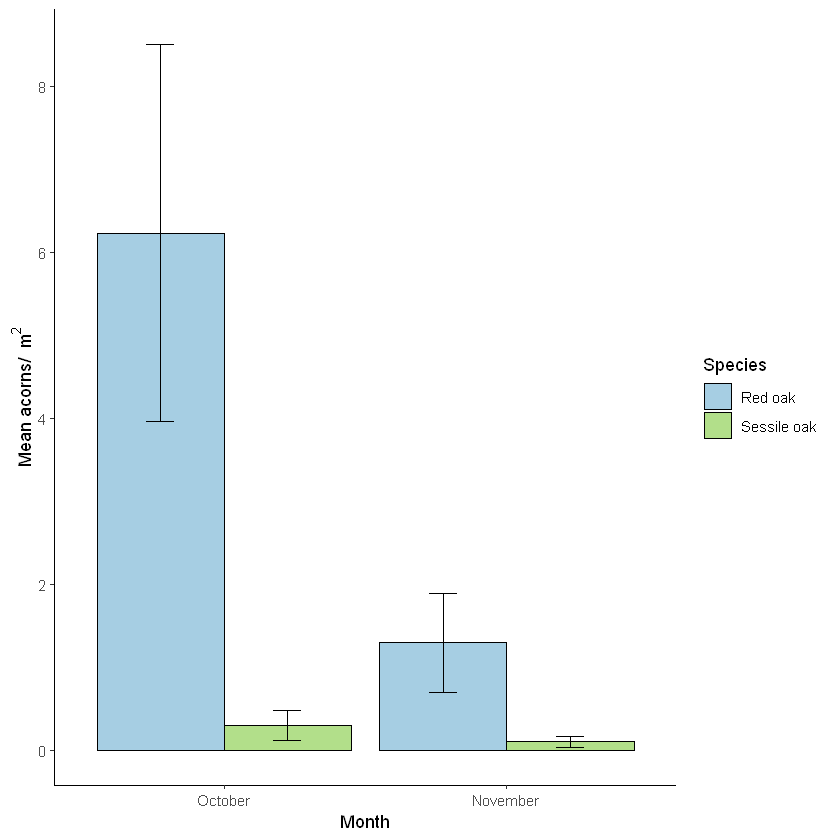

In [20]:
# bar graph mean acorn/m2 variation along season
acorns_b <- ggplot(acorns_stats, aes(x=factor (month, level=c("October", "November")), 
                                     y=mean_acorns, fill=species, na.rm=TRUE)) +
  geom_bar(stat = "identity", color = "black", size = 0.5,
           position = position_dodge()) +
  geom_errorbar(aes(ymin=mean_acorns - SE_acorns, ymax=mean_acorns + SE_acorns), 
                width=.2, size=0.5, position = position_dodge(.9)) +
  labs(x="Month", y=expression(paste("Mean acorns/ ", " m"^"2")), fill="Species") + 
  theme_classic() +
  scale_fill_manual(values=c('#a6cee3','#b2df8a'),
                    labels = c("Red oak", "Sessile oak")) +
  theme_classic()
acorns_b

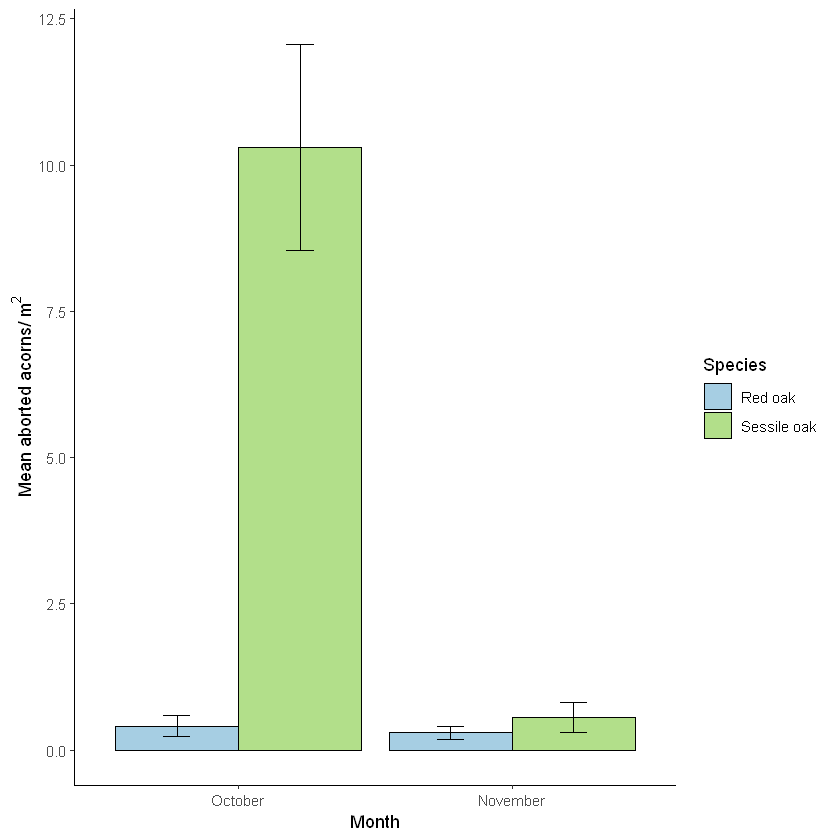

In [22]:
# bar graph mean ABORTED acorn/m2 variation along season
abacorns_b <- ggplot(ab_acorns_stats, aes(x=factor (month, level=c("October", "November")), 
                                     y=mean_abacorns, fill=species, na.rm=TRUE)) +
  geom_bar(stat = "identity", color = "black", size = 0.5,
           position = position_dodge()) +
  geom_errorbar(aes(ymin=mean_abacorns - SE_abacorns, ymax=mean_abacorns + SE_abacorns), 
                width=.2, size=0.5, position = position_dodge(.9)) +
  labs(x="Month", y=expression(paste("Mean aborted acorns/ ", "m"^"2")), fill = "Species") + 
  theme_classic() +
  scale_fill_manual(values=c('#a6cee3','#b2df8a'),
                    labels=c("Red oak", "Sessile oak")) +
  theme_classic()
abacorns_b